In [ ]:
%pip install yfinance pandas matplotlib seaborn

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#define the ticker symbol
tickerSymbol = "AAPL"


# DEFINE THE TIME PERIOD
start_date = "2024-01-01"

end_date = "2025-07-14"

In [ ]:
# DOWNLOAD THE DATA
data = yf.download(tickerSymbol, start=start_date, end=end_date)

#PRINT THE FIRST 5 ROWS OF THE DATA
print(data.head())  

C:\Users\z0052dbf\AppData\Local\Temp\ipykernel_23012\4133081376.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickerSymbol, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open    Volume
Ticker            AAPL        AAPL        AAPL        AAPL      AAPL
Date                                                                
2024-01-02  184.290405  187.070052  182.553128  185.789422  82488700
2024-01-03  182.910538  184.528693  182.096492  182.880757  58414500
2024-01-04  180.587540  181.758954  179.565029  180.825785  71983600
2024-01-05  179.862839  181.431354  178.860187  180.666963  62303300
2024-01-08  184.210999  184.250716  180.180517  180.766224  59144500


In [ ]:
#DATA exploration and cleaning 

#check for missing values
print(data.isnull().sum())

# handle missing values (if any) by filling them with mean
data.fillna(data.mean(), inplace=True)

#verfiy that there are no missing values
print(data.isnull().sum())

Price   Ticker
Close   AAPL      0
High    AAPL      0
Low     AAPL      0
Open    AAPL      0
Volume  AAPL      0
dtype: int64
Price   Ticker
Close   AAPL      0
High    AAPL      0
Low     AAPL      0
Open    AAPL      0
Volume  AAPL      0
dtype: int64


In [ ]:
# Data type conversion
# Data columns should be in the datetime format for time series analysis

#check the data types of the columns
print(data.dtypes)

#The index is already in datetime format
print(data.index)

Price   Ticker
Close   AAPL      float64
High    AAPL      float64
Low     AAPL      float64
Open    AAPL      float64
Volume  AAPL        int64
dtype: object
DatetimeIndex(['2024-01-02', '2024-01-03', '2024-01-04', '2024-01-05',
               '2024-01-08', '2024-01-09', '2024-01-10', '2024-01-11',
               '2024-01-12', '2024-01-16',
               ...
               '2025-06-27', '2025-06-30', '2025-07-01', '2025-07-02',
               '2025-07-03', '2025-07-07', '2025-07-08', '2025-07-09',
               '2025-07-10', '2025-07-11'],
              dtype='datetime64[ns]', name='Date', length=382, freq=None)


In [ ]:
# Print all column names in the data
print("Column names in the dataset:")
print(data.columns.tolist())

# Alternative way - just print the columns index
print("\nColumns (as Index object):")
print(data.columns)

Column names in the dataset:
[('Close', 'AAPL'), ('High', 'AAPL'), ('Low', 'AAPL'), ('Open', 'AAPL'), ('Volume', 'AAPL')]

Columns (as Index object):
MultiIndex([( 'Close', 'AAPL'),
            (  'High', 'AAPL'),
            (   'Low', 'AAPL'),
            (  'Open', 'AAPL'),
            ('Volume', 'AAPL')],
           names=['Price', 'Ticker'])


In [ ]:
#calculate daily returns
data['Daily Return'] = data['Close'].pct_change()

In [ ]:
print("Daily Returns:", data.head())

Daily Returns: Price            Close        High         Low        Open    Volume  \
Ticker            AAPL        AAPL        AAPL        AAPL      AAPL   
Date                                                                   
2024-01-02  184.290405  187.070052  182.553128  185.789422  82488700   
2024-01-03  182.910538  184.528693  182.096492  182.880757  58414500   
2024-01-04  180.587540  181.758954  179.565029  180.825785  71983600   
2024-01-05  179.862839  181.431354  178.860187  180.666963  62303300   
2024-01-08  184.210999  184.250716  180.180517  180.766224  59144500   

Price      Daily Return  
Ticker                   
Date                     
2024-01-02          NaN  
2024-01-03    -0.007487  
2024-01-04    -0.012700  
2024-01-05    -0.004013  
2024-01-08     0.024175  


In [ ]:
# Calculating Moving Averages
data['MA20'] = data['Close'].rolling(window=20).mean()
data['MA50'] = data['Close'].rolling(window=50).mean()  
data['MA200'] = data['Close'].rolling(window=200).mean()    

# print the first few rows to verify the moving averages
print(data.head())


Price            Close        High         Low        Open    Volume  \
Ticker            AAPL        AAPL        AAPL        AAPL      AAPL   
Date                                                                   
2024-01-02  184.290405  187.070052  182.553128  185.789422  82488700   
2024-01-03  182.910538  184.528693  182.096492  182.880757  58414500   
2024-01-04  180.587540  181.758954  179.565029  180.825785  71983600   
2024-01-05  179.862839  181.431354  178.860187  180.666963  62303300   
2024-01-08  184.210999  184.250716  180.180517  180.766224  59144500   

Price      Daily Return MA20 MA50 MA200  
Ticker                                   
Date                                     
2024-01-02          NaN  NaN  NaN   NaN  
2024-01-03    -0.007487  NaN  NaN   NaN  
2024-01-04    -0.012700  NaN  NaN   NaN  
2024-01-05    -0.004013  NaN  NaN   NaN  
2024-01-08     0.024175  NaN  NaN   NaN  


In [ ]:
# Why Moving Averages show NaN values:
# Moving averages require a minimum number of periods to calculate
# MA20 needs at least 20 days of data
# MA50 needs at least 50 days of data  
# MA200 needs at least 200 days of data

print("Checking data shape and date range:")
print(f"Total number of rows: {len(data)}")
print(f"Date range: {data.index.min()} to {data.index.max()}")
print()

# Check first valid moving average values
print("First valid MA20 value (at row 19, 20th day):")
print(data['MA20'].dropna().head(1))
print()

print("First valid MA50 value (at row 49, 50th day):")
print(data['MA50'].dropna().head(1))
print()

print("First valid MA200 value (at row 199, 200th day):")
print(data['MA200'].dropna().head(1))
print()

# Show data around the 20th day to see when MA20 starts
print("Data around day 20 (when MA20 becomes valid):")
print(data[['Close', 'MA20', 'MA50', 'MA200']].iloc[17:23])

Checking data shape and date range:
Total number of rows: 382
Date range: 2024-01-02 00:00:00 to 2025-07-11 00:00:00

First valid MA20 value (at row 19, 20th day):
Date
2024-01-30    186.524556
Name: MA20, dtype: float64

First valid MA50 value (at row 49, 50th day):
Date
2024-03-13    182.539559
Name: MA50, dtype: float64

First valid MA200 value (at row 199, 200th day):
Date
2024-10-16    198.335541
Name: MA200, dtype: float64

Data around day 20 (when MA20 becomes valid):
Price            Close        MA20 MA50 MA200
Ticker            AAPL                       
Date                                         
2024-01-26  191.021118         NaN  NaN   NaN
2024-01-29  190.336121         NaN  NaN   NaN
2024-01-30  186.672958  186.524556  NaN   NaN
2024-01-31  183.059418  186.463007  NaN   NaN
2024-02-01  185.501556  186.592558  NaN   NaN
2024-02-02  184.498901  186.788126  NaN   NaN


In [ ]:
# View data without NaN values
print("MA20 data (excluding NaN values):")
print(data[['Close', 'MA20']].dropna().head())
print()

# Use min_periods parameter to start calculating earlier
print("Alternative: Calculate MA20 with minimum 10 periods (will be less accurate initially):")
data['MA20_min10'] = data['Close'].rolling(window=20, min_periods=10).mean()
print(data[['Close', 'MA20', 'MA20_min10']].head(15))
print()

# Show data from a later date when all MAs are available
print("Data from day 200 onwards (when all moving averages are available):")
print(data[['Close', 'MA20', 'MA50', 'MA200']].iloc[200:205])

MA20 data (excluding NaN values):
Price            Close        MA20
Ticker            AAPL            
Date                              
2024-01-30  186.672958  186.524556
2024-01-31  183.059418  186.463007
2024-02-01  185.501556  186.592558
2024-02-02  184.498901  186.788126
2024-02-05  186.315582  187.110763

Alternative: Calculate MA20 with minimum 10 periods (will be less accurate initially):
Price            Close MA20 MA20_min10
Ticker            AAPL                
Date                                  
2024-01-02  184.290405  NaN        NaN
2024-01-03  182.910538  NaN        NaN
2024-01-04  180.587540  NaN        NaN
2024-01-05  179.862839  NaN        NaN
2024-01-08  184.210999  NaN        NaN
2024-01-09  183.794052  NaN        NaN
2024-01-10  184.836441  NaN        NaN
2024-01-11  184.240784  NaN        NaN
2024-01-12  184.568375  NaN        NaN
2024-01-16  182.295013  NaN        NaN
2024-01-17  181.351929  NaN        NaN
2024-01-18  187.258682  NaN        NaN
2024-01-19  1

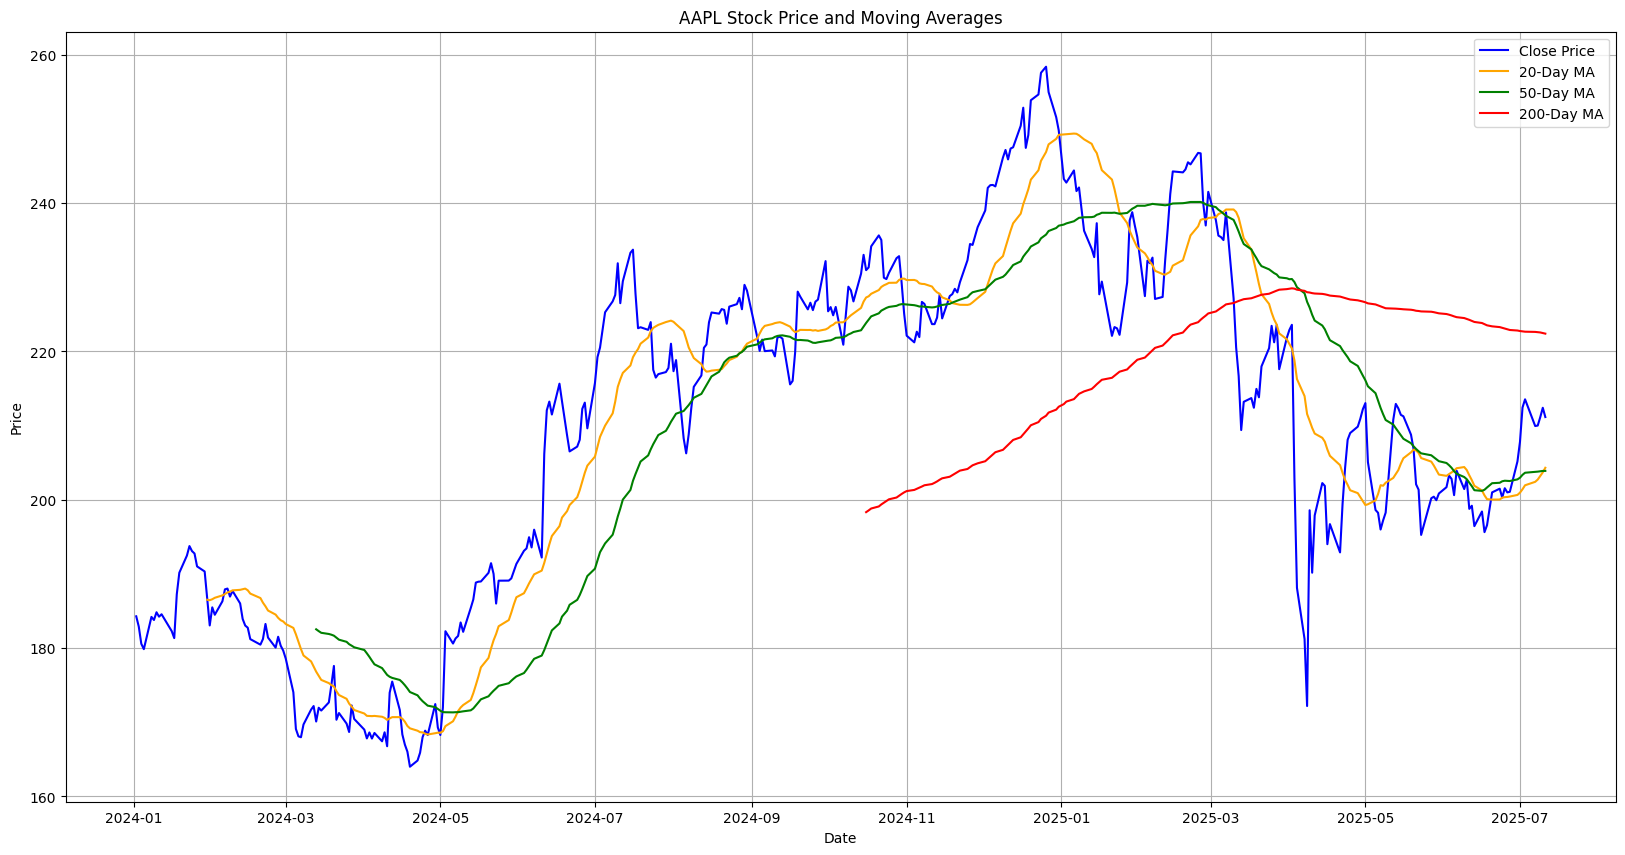

In [ ]:
#DATA VISUALIZATION
plt.figure(figsize=(20, 10))
plt.plot(data['Close'], label='Close Price', color='blue')      
plt.plot(data['MA20'], label='20-Day MA', color='orange')
plt.plot(data['MA50'], label='50-Day MA', color='green')            
plt.plot(data['MA200'], label='200-Day MA', color='red')
plt.title(f"{tickerSymbol} Stock Price and Moving Averages")    
plt.xlabel("Date")
plt.ylabel("Price") 
plt.legend()
plt.grid(True)
plt.show()


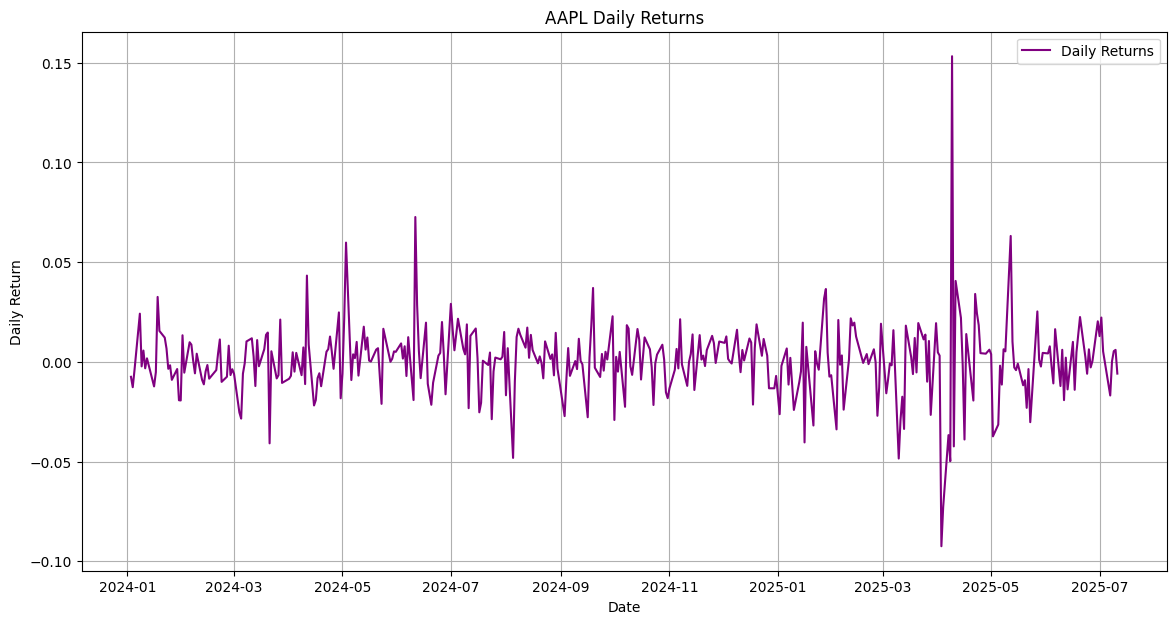

In [ ]:
# Plot the daily returns
plt.figure(figsize=(14, 7))
plt.plot(data['Daily Return'], label='Daily Returns', color='purple')
plt.xlabel("Date")
plt.ylabel("Daily Return")
plt.title(f"{tickerSymbol} Daily Returns")   
plt.legend()
plt.grid(True)
plt.show()

C:\Users\z0052dbf\AppData\Local\Temp\ipykernel_23012\3396112421.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


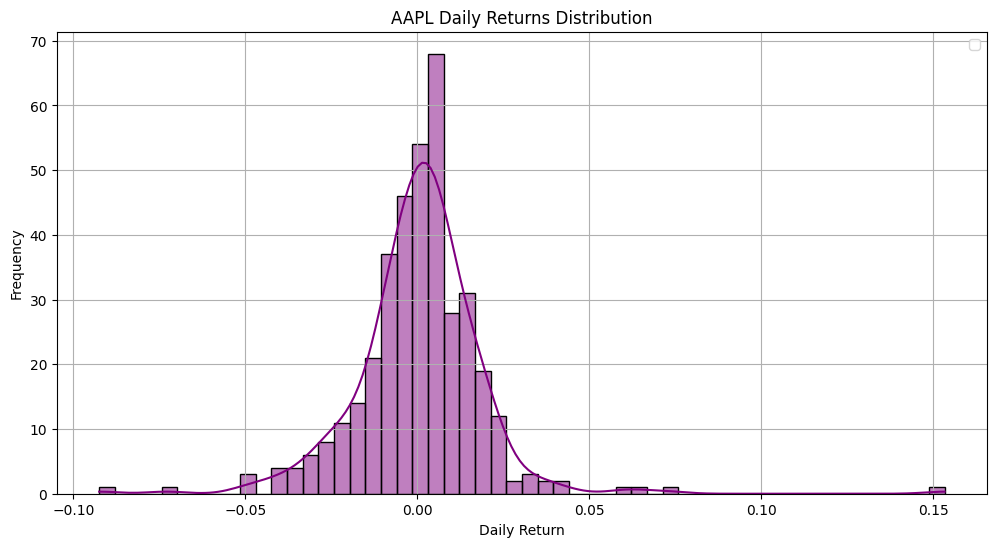

In [ ]:
# Plot the distribution of daily returns
plt.figure(figsize=(12, 6))
sns.histplot(data['Daily Return'].dropna(), kde=True, color='purple')
plt.title(f"{tickerSymbol} Daily Returns Distribution")
plt.xlabel("Daily Return")      
plt.ylabel("Frequency")
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
%pip install mplfinance

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


C:\Users\z0052dbf\AppData\Local\Temp\ipykernel_23012\400098531.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Date'] = data.index


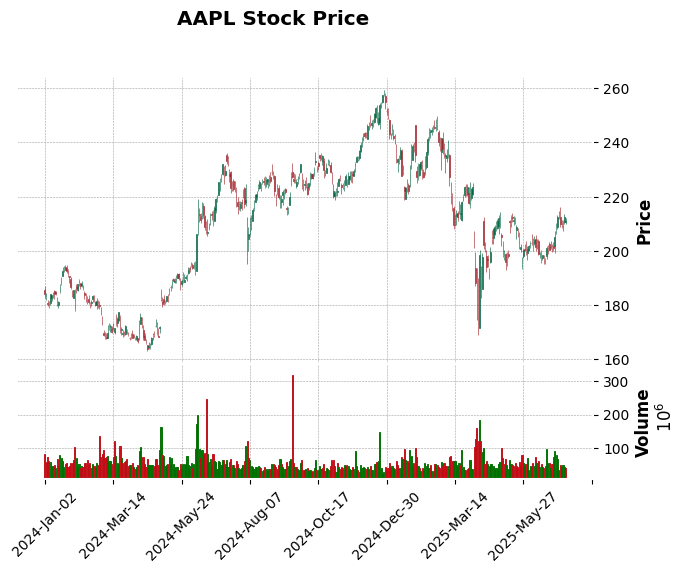

In [ ]:
import mplfinance as mpf

# prepare data for mplfinance
data['Date'] = data.index

data = data[['Date','Open', 'High', 'Low', 'Close', 'Volume']]
data.columns = ['Date','Open', 'High', 'Low', 'Close', 'Volume']
data = data.set_index('Date')

data.index = pd.to_datetime(data.index)

#Plot the candlestick chart
mpf.plot(data, type='candle', style='charles', volume=True, title=f"{tickerSymbol} Stock Price", ylabel='Price', ylabel_lower='Volume')

# Financial Indicators: RSI and MACD

## Layman's Explanation

### Relative Strength Index (RSI)
Think of RSI like a "speedometer" for stock prices that tells you if a stock is being bought or sold too aggressively:
- **Range**: 0 to 100
- **Above 70**: Stock might be "overbought" (too expensive, might go down soon)
- **Below 30**: Stock might be "oversold" (too cheap, might go up soon)
- **Around 50**: Stock is in a neutral zone

It's like checking if a car is going too fast (overbought) or too slow (oversold) on a highway.

### Moving Average Convergence Divergence (MACD)
MACD is like having two different "trend followers" that help you spot when a stock's momentum is changing:
- **MACD Line**: Shows the relationship between two moving averages
- **Signal Line**: A smoother version of the MACD line
- **Histogram**: Shows the difference between MACD and Signal lines

When these lines cross each other, it often signals that the stock's trend might be changing direction.

## Technical and Mathematical Explanation

### RSI (Relative Strength Index)
**Formula**: RSI = 100 - (100 / (1 + RS))
- **RS (Relative Strength)** = Average Gain / Average Loss over n periods (typically 14 days)
- **Average Gain** = Sum of gains over n periods / n
- **Average Loss** = Sum of losses over n periods / n

**Technical Details**:
- RSI is a momentum oscillator developed by J. Welles Wilder
- It measures the speed and change of price movements
- Uses exponential smoothing for more recent price changes
- Common period: 14 days

### MACD (Moving Average Convergence Divergence)
**Components**:
1. **MACD Line** = 12-period EMA - 26-period EMA
2. **Signal Line** = 9-period EMA of MACD Line
3. **Histogram** = MACD Line - Signal Line

**Technical Details**:
- Developed by Gerald Appel in the 1970s
- **EMA (Exponential Moving Average)** gives more weight to recent prices
- **Convergence**: When MACD line moves toward Signal line
- **Divergence**: When MACD line moves away from Signal line
- **Bullish Signal**: MACD crosses above Signal line
- **Bearish Signal**: MACD crosses below Signal line

In [ ]:
# Reload the original data (since it was modified for candlestick chart)
data = yf.download(tickerSymbol, start=start_date, end=end_date)

# Calculate RSI (14-period)
def calculate_rsi(prices, period=14):
    """
    Calculate Relative Strength Index (RSI)
    """
    # Calculate price changes
    delta = prices.diff()
    
    # Separate gains and losses
    gains = delta.where(delta > 0, 0)
    losses = -delta.where(delta < 0, 0)
    
    # Calculate average gains and losses using exponential moving average
    avg_gains = gains.ewm(span=period, adjust=False).mean()
    avg_losses = losses.ewm(span=period, adjust=False).mean()
    
    # Calculate Relative Strength (RS)
    rs = avg_gains / avg_losses
    
    # Calculate RSI
    rsi = 100 - (100 / (1 + rs))
    
    return rsi

# Calculate RSI for our data
data['RSI'] = calculate_rsi(data['Close'])

print("RSI calculated successfully!")
print("First few RSI values:")
print(data[['Close', 'RSI']].head(20))

C:\Users\z0052dbf\AppData\Local\Temp\ipykernel_23012\24867884.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickerSymbol, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed

RSI calculated successfully!
First few RSI values:
Price            Close        RSI
Ticker            AAPL           
Date                             
2024-01-02  184.290405        NaN
2024-01-03  182.910538   0.000000
2024-01-04  180.587540   0.000000
2024-01-05  179.862839   0.000000
2024-01-08  184.210999  57.067660
2024-01-09  183.794052  53.678346
2024-01-10  184.836441  60.453608
2024-01-11  184.240784  55.136272
2024-01-12  184.568375  57.507987
2024-01-16  182.295013  40.404594
2024-01-17  181.351929  35.369443
2024-01-18  187.258682  65.994502
2024-01-19  190.167374  73.207934
2024-01-22  192.480469  77.573143
2024-01-23  193.761047  79.687255
2024-01-24  193.086014  75.366073
2024-01-25  192.758423  73.145050
2024-01-26  191.021118  61.969974
2024-01-29  190.336121  57.942578
2024-01-30  186.672958  41.357642


In [ ]:
# Calculate MACD
def calculate_macd(prices, fast_period=12, slow_period=26, signal_period=9):
    """
    Calculate MACD (Moving Average Convergence Divergence)
    """
    # Calculate exponential moving averages
    ema_fast = prices.ewm(span=fast_period).mean()
    ema_slow = prices.ewm(span=slow_period).mean()
    
    # Calculate MACD line
    macd_line = ema_fast - ema_slow
    
    # Calculate Signal line (9-period EMA of MACD)
    signal_line = macd_line.ewm(span=signal_period).mean()
    
    # Calculate Histogram
    histogram = macd_line - signal_line
    
    return macd_line, signal_line, histogram

# Calculate MACD for our data
data['MACD'], data['MACD_Signal'], data['MACD_Histogram'] = calculate_macd(data['Close'])

print("MACD calculated successfully!")
print("First few MACD values:")
print(data[['Close', 'MACD', 'MACD_Signal', 'MACD_Histogram']].head(30))

MACD calculated successfully!
First few MACD values:
Price            Close MACD MACD_Signal MACD_Histogram
Ticker            AAPL                                
Date                                                  
2024-01-02  184.290405  NaN         NaN            NaN
2024-01-03  182.910538  NaN         NaN            NaN
2024-01-04  180.587540  NaN         NaN            NaN
2024-01-05  179.862839  NaN         NaN            NaN
2024-01-08  184.210999  NaN         NaN            NaN
2024-01-09  183.794052  NaN         NaN            NaN
2024-01-10  184.836441  NaN         NaN            NaN
2024-01-11  184.240784  NaN         NaN            NaN
2024-01-12  184.568375  NaN         NaN            NaN
2024-01-16  182.295013  NaN         NaN            NaN
2024-01-17  181.351929  NaN         NaN            NaN
2024-01-18  187.258682  NaN         NaN            NaN
2024-01-19  190.167374  NaN         NaN            NaN
2024-01-22  192.480469  NaN         NaN            NaN
2024-01-23  

In [ ]:
# Analyze the calculated indicators
print("=== RSI Analysis ===")
print(f"RSI Statistics:")
print(data['RSI'].describe())
print()

# Count RSI signals
rsi_overbought = (data['RSI'] > 70).sum()
rsi_oversold = (data['RSI'] < 30).sum()
rsi_neutral = ((data['RSI'] >= 30) & (data['RSI'] <= 70)).sum()

print(f"RSI Signals:")
print(f"Overbought (>70): {rsi_overbought} days")
print(f"Oversold (<30): {rsi_oversold} days") 
print(f"Neutral (30-70): {rsi_neutral} days")
print()

print("=== MACD Analysis ===")
print("MACD Statistics:")
print(data[['MACD', 'MACD_Signal', 'MACD_Histogram']].describe())
print()

# Find MACD crossovers
macd_bullish = ((data['MACD'] > data['MACD_Signal']) & 
                (data['MACD'].shift(1) <= data['MACD_Signal'].shift(1))).sum()
macd_bearish = ((data['MACD'] < data['MACD_Signal']) & 
                (data['MACD'].shift(1) >= data['MACD_Signal'].shift(1))).sum()

print(f"MACD Crossovers:")
print(f"Bullish crossovers (MACD crosses above Signal): {macd_bullish}")
print(f"Bearish crossovers (MACD crosses below Signal): {macd_bearish}")

# Show recent values
print("\n=== Recent Indicator Values ===")
print(data[['Close', 'RSI', 'MACD', 'MACD_Signal', 'MACD_Histogram']].tail(10))

In [ ]:
# Visualize RSI
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10), sharex=True)

# Plot stock price
ax1.plot(data.index, data['Close'], label='Close Price', color='blue', linewidth=1)
ax1.set_title(f'{tickerSymbol} Stock Price')
ax1.set_ylabel('Price ($)')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot RSI
ax2.plot(data.index, data['RSI'], label='RSI', color='purple', linewidth=1)
ax2.axhline(y=70, color='red', linestyle='--', alpha=0.7, label='Overbought (70)')
ax2.axhline(y=30, color='green', linestyle='--', alpha=0.7, label='Oversold (30)')
ax2.axhline(y=50, color='gray', linestyle='-', alpha=0.5, label='Neutral (50)')
ax2.fill_between(data.index, 70, 100, alpha=0.2, color='red', label='Overbought Zone')
ax2.fill_between(data.index, 0, 30, alpha=0.2, color='green', label='Oversold Zone')
ax2.set_title('RSI (Relative Strength Index)')
ax2.set_ylabel('RSI')
ax2.set_xlabel('Date')
ax2.set_ylim(0, 100)
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
# Visualize MACD
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10), sharex=True)

# Plot stock price
ax1.plot(data.index, data['Close'], label='Close Price', color='blue', linewidth=1)
ax1.set_title(f'{tickerSymbol} Stock Price')
ax1.set_ylabel('Price ($)')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot MACD
ax2.plot(data.index, data['MACD'], label='MACD Line', color='blue', linewidth=1)
ax2.plot(data.index, data['MACD_Signal'], label='Signal Line', color='red', linewidth=1)

# Plot histogram
colors = ['green' if x >= 0 else 'red' for x in data['MACD_Histogram']]
ax2.bar(data.index, data['MACD_Histogram'], label='MACD Histogram', 
        color=colors, alpha=0.3, width=1)

ax2.axhline(y=0, color='black', linestyle='-', alpha=0.5)
ax2.set_title('MACD (Moving Average Convergence Divergence)')
ax2.set_ylabel('MACD')
ax2.set_xlabel('Date')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
# Generate Trading Signals
def generate_signals(data):
    """
    Generate buy/sell signals based on RSI and MACD
    """
    signals = pd.DataFrame(index=data.index)
    signals['Price'] = data['Close']
    signals['RSI'] = data['RSI']
    signals['MACD'] = data['MACD']
    signals['MACD_Signal'] = data['MACD_Signal']
    
    # RSI Signals
    signals['RSI_Signal'] = 0  # 0 = Hold, 1 = Buy, -1 = Sell
    signals.loc[signals['RSI'] < 30, 'RSI_Signal'] = 1  # Buy when oversold
    signals.loc[signals['RSI'] > 70, 'RSI_Signal'] = -1  # Sell when overbought
    
    # MACD Signals
    signals['MACD_Signal_Flag'] = 0
    # Buy when MACD crosses above Signal line
    signals.loc[(signals['MACD'] > signals['MACD_Signal']) & 
                (signals['MACD'].shift(1) <= signals['MACD_Signal'].shift(1)), 'MACD_Signal_Flag'] = 1
    # Sell when MACD crosses below Signal line  
    signals.loc[(signals['MACD'] < signals['MACD_Signal']) & 
                (signals['MACD'].shift(1) >= signals['MACD_Signal'].shift(1)), 'MACD_Signal_Flag'] = -1
    
    # Combined Signal (both indicators must agree)
    signals['Combined_Signal'] = 0
    signals.loc[(signals['RSI_Signal'] == 1) & (signals['MACD_Signal_Flag'] == 1), 'Combined_Signal'] = 1
    signals.loc[(signals['RSI_Signal'] == -1) & (signals['MACD_Signal_Flag'] == -1), 'Combined_Signal'] = -1
    
    return signals

# Generate signals
signals = generate_signals(data)

# Display signal summary
print("=== Trading Signals Summary ===")
print(f"RSI Buy Signals (Oversold): {(signals['RSI_Signal'] == 1).sum()}")
print(f"RSI Sell Signals (Overbought): {(signals['RSI_Signal'] == -1).sum()}")
print(f"MACD Buy Signals: {(signals['MACD_Signal_Flag'] == 1).sum()}")
print(f"MACD Sell Signals: {(signals['MACD_Signal_Flag'] == -1).sum()}")
print(f"Combined Buy Signals: {(signals['Combined_Signal'] == 1).sum()}")
print(f"Combined Sell Signals: {(signals['Combined_Signal'] == -1).sum()}")

# Show recent signals
print("\n=== Recent Trading Signals ===")
recent_signals = signals[['Price', 'RSI', 'RSI_Signal', 'MACD_Signal_Flag', 'Combined_Signal']].tail(10)
print(recent_signals)

In [ ]:
# Visualize Trading Signals
plt.figure(figsize=(15, 8))

# Plot stock price
plt.plot(data.index, data['Close'], label='Close Price', color='blue', linewidth=1)

# Plot buy signals
buy_signals = signals[signals['Combined_Signal'] == 1]
plt.scatter(buy_signals.index, buy_signals['Price'], 
           color='green', marker='^', s=100, label='Buy Signal', zorder=5)

# Plot sell signals
sell_signals = signals[signals['Combined_Signal'] == -1]
plt.scatter(sell_signals.index, sell_signals['Price'], 
           color='red', marker='v', s=100, label='Sell Signal', zorder=5)

plt.title(f'{tickerSymbol} Stock Price with Combined RSI & MACD Trading Signals')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Show specific buy/sell dates
if len(buy_signals) > 0:
    print("=== Buy Signal Dates ===")
    for date, row in buy_signals.iterrows():
        print(f"Date: {date.strftime('%Y-%m-%d')}, Price: ${row['Price']:.2f}, RSI: {row['RSI']:.2f}")

if len(sell_signals) > 0:
    print("\n=== Sell Signal Dates ===")
    for date, row in sell_signals.iterrows():
        print(f"Date: {date.strftime('%Y-%m-%d')}, Price: ${row['Price']:.2f}, RSI: {row['RSI']:.2f}")

# Understanding the MACD Line in Detail

## What is the MACD Line?

The **MACD Line** is the core component of the MACD indicator. Let's break it down:

### Formula:
**MACD Line = 12-period EMA - 26-period EMA**

### What this means:

1. **12-period EMA (Fast Line)**: 
   - Exponential Moving Average over 12 periods (typically days)
   - Reacts quickly to recent price changes
   - More sensitive to short-term price movements

2. **26-period EMA (Slow Line)**:
   - Exponential Moving Average over 26 periods
   - Reacts more slowly to price changes
   - Represents longer-term trend

3. **MACD Line (The Difference)**:
   - When MACD Line > 0: Fast EMA is above Slow EMA (bullish momentum)
   - When MACD Line < 0: Fast EMA is below Slow EMA (bearish momentum)
   - When MACD Line crosses 0: Fast and Slow EMAs are crossing each other

### Real-World Analogy:
Think of two cars on a highway:
- **Fast EMA (12-day)**: A sports car that accelerates and decelerates quickly
- **Slow EMA (26-day)**: A truck that changes speed gradually
- **MACD Line**: The distance between them

When the sports car is ahead of the truck (MACD > 0), the stock has upward momentum.
When the truck is ahead (MACD < 0), the stock has downward momentum.

In [ ]:
# Practical Demonstration: Breaking Down MACD Line Calculation
print("=== MACD Line Breakdown ===")

# Let's recalculate and show each component step by step
# Using our existing AAPL data

# Step 1: Calculate 12-day EMA (Fast)
ema_12 = data[('Close', 'AAPL')].ewm(span=12).mean()

# Step 2: Calculate 26-day EMA (Slow) 
ema_26 = data[('Close', 'AAPL')].ewm(span=26).mean()

# Step 3: Calculate MACD Line (Fast - Slow)
macd_line_manual = ema_12 - ema_26

# Show the components
print("Recent values showing MACD calculation:")
breakdown_df = pd.DataFrame({
    'Close_Price': data[('Close', 'AAPL')],
    'EMA_12 (Fast)': ema_12,
    'EMA_26 (Slow)': ema_26,
    'MACD_Line': macd_line_manual,
    'Our_MACD': data[('MACD', '')]  # From our earlier calculation
})

print(breakdown_df.tail(10))

# Verify our calculation matches
print(f"\nVerification: Manual MACD matches our function: {macd_line_manual.equals(data['MACD'])}")

print("\n=== Interpretation ===")
latest_values = breakdown_df.iloc[-1]
print(f"Latest Close Price: ${latest_values['Close_Price']:.2f}")
print(f"12-day EMA (Fast): ${latest_values['EMA_12 (Fast)']:.2f}")
print(f"26-day EMA (Slow): ${latest_values['EMA_26 (Slow)']:.2f}")
print(f"MACD Line: {latest_values['MACD_Line']:.4f}")

if latest_values['MACD_Line'] > 0:
    print("📈 MACD > 0: Fast EMA is above Slow EMA (Bullish momentum)")
else:
    print("📉 MACD < 0: Fast EMA is below Slow EMA (Bearish momentum)")

# Siemens India Stock Analysis

Now let's apply the same comprehensive analysis to **Siemens Ltd India** using the NSE ticker `SIEMENS.NS`.

We'll calculate:
- Moving Averages (20, 50, 200-day)
- RSI (Relative Strength Index)
- MACD (Moving Average Convergence Divergence)
- Trading Signals
- Technical Analysis

In [ ]:
# Download Siemens India Stock Data
print("=== Downloading Siemens India Stock Data ===")

# Define Siemens India ticker
siemens_ticker = "SIEMENS.NS"  # NSE listing
siemens_start_date = "2024-01-01"
siemens_end_date = "2025-07-14"

# Download the data
try:
    siemens_data = yf.download(siemens_ticker, start=siemens_start_date, end=siemens_end_date)
    
    print(f"Siemens India ({siemens_ticker}) data downloaded successfully!")
    print(f"Data shape: {siemens_data.shape}")
    print(f"Date range: {siemens_data.index.min()} to {siemens_data.index.max()}")
    print()
    
    # Get company information
    siemens_info = yf.Ticker(siemens_ticker)
    info = siemens_info.info
    
    print("=== Siemens India Company Information ===")
    print(f"Company Name: {info.get('longName', 'Siemens Limited')}")
    print(f"Current Price: ₹{info.get('currentPrice', 'N/A')}")
    print(f"Market Cap: ₹{info.get('marketCap', 'N/A'):,}" if info.get('marketCap') else "Market Cap: N/A")
    print(f"52 Week High: ₹{info.get('fiftyTwoWeekHigh', 'N/A')}")
    print(f"52 Week Low: ₹{info.get('fiftyTwoWeekLow', 'N/A')}")
    print()
    
    # Display first few rows
    print("First 5 rows of Siemens India data:")
    print(siemens_data.head())
    
except Exception as e:
    print(f"Error downloading Siemens India data: {e}")
    print("This might be due to market hours, network issues, or ticker symbol problems.")

=== Downloading Siemens India Stock Data ===


C:\Users\z0052dbf\AppData\Local\Temp\ipykernel_23012\394037753.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  siemens_data = yf.download(siemens_ticker, start=siemens_start_date, end=siemens_end_date)
[*********************100%***********************]  1 of 1 completed


Siemens India (SIEMENS.NS) data downloaded successfully!
Data shape: (378, 5)
Date range: 2024-01-01 00:00:00 to 2025-07-11 00:00:00

=== Siemens India Company Information ===
Company Name: Siemens Limited
Current Price: ₹3134.0
Market Cap: ₹1,161,253,617,664
52 Week High: ₹8129.9
52 Week Low: ₹2450.0

First 5 rows of Siemens India data:
Price             Close         High          Low         Open     Volume
Ticker       SIEMENS.NS   SIEMENS.NS   SIEMENS.NS   SIEMENS.NS SIEMENS.NS
Date                                                                     
2024-01-01  4007.926025  4040.233909  3991.448433  4011.360873     127992
2024-01-02  4023.906006  4031.273511  3949.333772  4027.340853     210466
2024-01-03  4067.265137  4092.006441  4036.400855  4037.247230     347303
2024-01-04  4070.749756  4109.031616  4058.702876  4084.041407     221232
2024-01-05  4059.350098  4096.536435  4039.238581  4081.203953     140037
